# Speech Emotion Recognition

# Importing the required libraries

In [1]:
#python
import os

#package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import IPython.display as ipd
import librosa.display
import scipy.io.wavfile

#keras
from keras.utils import np_utils

#sklearn
from sklearn.preprocessing import LabelEncoder

from scipy import signal
from tqdm import tqdm_notebook as tqdm

Using TensorFlow backend.
C:\Users\ayush\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ayush\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ayush\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ayush\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

# Importing dataset 

In [2]:
#Data directory
dir_list=os.listdir('E:/SER/audio/')
dir_list.sort()
print(dir_list)

['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


# Pre-processing

In [3]:
#create Dataframe
ravdess_db=pd.DataFrame(columns=['path','source','actor','gender','emotion','emotion_lb'])
count=0
for i in dir_list:
    file_list=os.listdir('E:/SER/audio/'+i)
    for f in file_list:
        nm=f.split('.')[0].split('-')
        path='E:/SER/audio/'+i+'/'+f
        actor=int(nm[-1])
        emotion=int(nm[2])
        source="Ravdess"
            
        if int(actor)%2==0:
            gender="female"
        else:
            gender="male"
            
        if nm[3]=='01':
            intensity=0
        else:
            intensity=1
            
        if nm[4]=='01':
            statement=0
        else:
            statement=1
            
        if nm[5]=='01':
            repeat=0
        else:
            repeat=1
            
        if emotion==1:
            lb="neutral"
        elif emotion==2:
            lb="calm"
        elif emotion==3:
            lb="happy"
        elif emotion==4:
            lb="sad"
        elif emotion==5:
            lb="angry"
        elif emotion==6:
            lb="fearful"
        elif emotion==7:
            lb="disgust"
        elif emotion==8:
            lb="surprised"
        else:
            lb="none"
            
        ravdess_db.loc[count]=[path,source,actor,gender,emotion,lb]
        count+=1

In [4]:
print(len(ravdess_db))

1440


In [5]:
ravdess_db.sort_values(by='path',inplace=True)
ravdess_db.index=range(len(ravdess_db.index))
ravdess_db.head()

,path,source,actor,gender,emotion,emotion_lb
0,E:/SER/audio/Actor_01/03-01-01-01-01-01-01.wav,Ravdess,1,male,1,neutral
1,E:/SER/audio/Actor_01/03-01-01-01-01-02-01.wav,Ravdess,1,male,1,neutral
2,E:/SER/audio/Actor_01/03-01-01-01-02-01-01.wav,Ravdess,1,male,1,neutral
3,E:/SER/audio/Actor_01/03-01-01-01-02-02-01.wav,Ravdess,1,male,1,neutral
4,E:/SER/audio/Actor_01/03-01-02-01-01-01-01.wav,Ravdess,1,male,2,calm


In [6]:
ravdess_db.to_csv('C:/Users/ayush/Speech Emotion/csv/list.csv')

In [7]:
ravdess_db['split']=np.where((ravdess_db.actor==23) | (ravdess_db.actor==24), 'Test',
                              (np.where((ravdess_db.actor==21) | (ravdess_db.actor==22),'Val', 'Train')))

In [8]:
ravdess_db['split'].value_counts()

Train    1200
Test      120
Val       120
Name: split, dtype: int64

In [9]:
ravdess_db.shape

(1440, 7)

In [10]:
ravdess_db.emotion_lb.value_counts()

sad          192
surprised    192
fearful      192
happy        192
disgust      192
calm         192
angry        192
neutral       96
Name: emotion_lb, dtype: int64

### Changing Calm to Neutral

In [11]:
ravdess_db.loc[ravdess_db.emotion_lb=='calm',['emotion','emotion_lb']]=1,'neutral'

In [12]:
ravdess_db.emotion_lb.value_counts()

neutral      288
sad          192
surprised    192
fearful      192
happy        192
disgust      192
angry        192
Name: emotion_lb, dtype: int64

In [13]:
dataset_db=ravdess_db

In [14]:
dataset_db.emotion_lb=dataset_db.gender+"_"+dataset_db.emotion_lb

In [15]:
dataset_db.to_csv('C:/Users/ayush/Speech Emotion/csv/list2.csv')

In [16]:
dataset_db.head()

,path,source,actor,gender,emotion,emotion_lb,split
0,E:/SER/audio/Actor_01/03-01-01-01-01-01-01.wav,Ravdess,1,male,1,male_neutral,Train
1,E:/SER/audio/Actor_01/03-01-01-01-01-02-01.wav,Ravdess,1,male,1,male_neutral,Train
2,E:/SER/audio/Actor_01/03-01-01-01-02-01-01.wav,Ravdess,1,male,1,male_neutral,Train
3,E:/SER/audio/Actor_01/03-01-01-01-02-02-01.wav,Ravdess,1,male,1,male_neutral,Train
4,E:/SER/audio/Actor_01/03-01-02-01-01-01-01.wav,Ravdess,1,male,1,male_neutral,Train


In [17]:
dataset_db.emotion_lb.value_counts()

male_neutral        144
female_neutral      144
male_sad             96
male_disgust         96
female_angry         96
male_fearful         96
female_sad           96
female_happy         96
female_surprised     96
male_angry           96
male_surprised       96
female_disgust       96
female_fearful       96
male_happy           96
Name: emotion_lb, dtype: int64

# Plotting the audio file's waveform

In [18]:
sampling_rate = 44100

In [19]:
filename = ravdess_db.path[0]
print (filename)

E:/SER/audio/Actor_01/03-01-01-01-01-01-01.wav


In [20]:
samples, sample_rate = librosa.load(filename, res_type='kaiser_fast',sr=sampling_rate)
sample_rate, samples.shape

(44100, (145676,))

In [21]:
ipd.Audio(samples,rate=sample_rate)

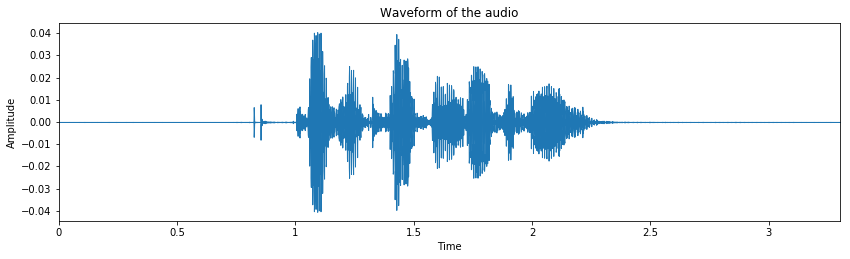

In [22]:
# Plotting Wave Form
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Waveform of the audio')
ax1.set_ylabel('Amplitude')
librosa.display.waveplot(samples, sr=sample_rate)

### Trim the Audio


In [23]:
samples_trim, index = librosa.effects.trim(samples,top_db=25)
samples_trim.shape, index

((55296,), array([44032, 99328]))

In [24]:
ipd.Audio(samples_trim,rate=sample_rate)

In [25]:
Difference_in_length = len(samples)-len(samples_trim)
Difference_in_length

90380

In [26]:
Difference_in_duration = librosa.get_duration(samples)-librosa.get_duration(samples_trim)
Difference_in_duration

4.098866213151927

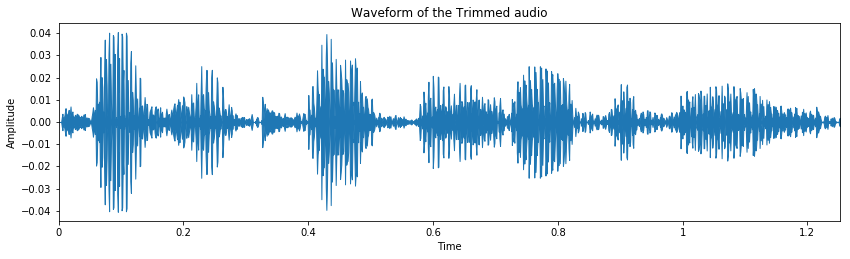

In [27]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Waveform of the Trimmed audio')
ax1.set_ylabel('Amplitude')
librosa.display.waveplot(samples_trim, sr=sample_rate)

#### Wiener Filter to remove Noise



In [28]:
sample_weiner = scipy.signal.wiener(samples_trim)
len(sample_weiner)

55296

In [29]:
ipd.Audio(sample_weiner,rate=sample_rate)

In [30]:
Diff_noise = sample_weiner-samples_trim
ipd.Audio(Diff_noise,rate=sample_rate)

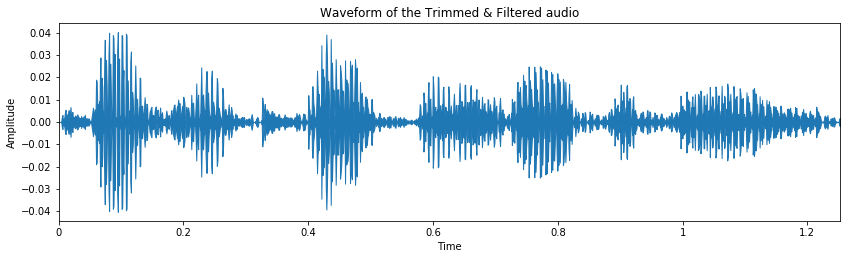

In [31]:
# Plotting Wave Form 
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Waveform of the Trimmed & Filtered audio')
ax1.set_ylabel('Amplitude')
librosa.display.waveplot(sample_weiner, sr=sample_rate)

#### Waveform of the noise in the audio

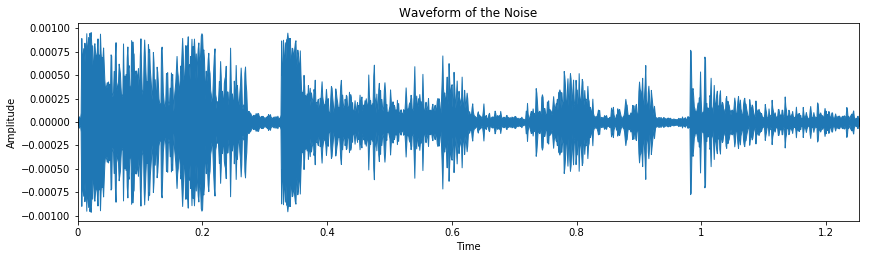

In [32]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Waveform of the Noise')
ax1.set_ylabel('Amplitude')
librosa.display.waveplot(Diff_noise, sr=sample_rate)

In [33]:
dataset_db.index = range(len(dataset_db.index))

In [34]:
dataset_db.shape

(1440, 7)

# Feature Extraction

In [35]:
audio_duration=3
sampling_rate=44100
input_length=sampling_rate * audio_duration
n_mfcc = 20

In [36]:
data_sample = np.zeros(input_length)
MFCC = librosa.feature.mfcc(data_sample, sr=sampling_rate, n_mfcc=n_mfcc)

In [37]:
MFCC.shape

(20, 259)

In [38]:
dataset_db.split.value_counts()

Train    1200
Test      120
Val       120
Name: split, dtype: int64

In [39]:
signal, sample_rate = librosa.load(dataset_db.path[0], res_type='kaiser_fast',sr=sampling_rate)
signal,index = librosa.effects.trim(signal,top_db = 25)
signal = scipy.signal.wiener(signal)

if len(signal) > input_length:
    signal = signal[0:input_length]
elif  input_length > len(signal):
    max_offset = input_length - len(signal)  
    signal = np.pad(signal, (0, max_offset), "constant")

In [40]:
signal = np.array(signal).reshape(-1,1)

In [41]:
signal.shape

(132300, 1)

In [42]:
audios= np.empty(shape=(dataset_db.shape[0],128, MFCC.shape[1], 1))

count=0
for i in tqdm(range(len(dataset_db))):
    signal, sample_rate = librosa.load(dataset_db.path[i], res_type='kaiser_fast',sr=sampling_rate)
    signal,index = librosa.effects.trim(signal,top_db = 25)
    signal = scipy.signal.wiener(signal)
    
    if len(signal) > input_length:
        signal = signal[0:input_length]
    elif  input_length > len(signal):
        max_offset = input_length - len(signal)  
        signal = np.pad(signal, (0, max_offset), "constant")

    melspec = librosa.feature.melspectrogram(signal, sr=sample_rate, n_mels=128,n_fft=2048,hop_length=512)   
    logspec = librosa.amplitude_to_db(melspec)
    logspec = np.expand_dims(logspec, axis=-1)
    audios[count,] = logspec 
    count+=1

C:\Users\ayush\AppData\Roaming\Python\Python37\site-packages\scipy\signal\signaltools.py:974: RuntimeWarning: divide by zero encountered in true_divide
  res *= (1 - noise / lVar)
C:\Users\ayush\AppData\Roaming\Python\Python37\site-packages\scipy\signal\signaltools.py:974: RuntimeWarning: invalid value encountered in multiply
  res *= (1 - noise / lVar)


In [43]:
audios.shape

(1440, 128, 259, 1)

In [44]:
import h5py
with h5py.File('Ravdess_audio_Mel_spec.h5', 'w') as hf:
    hf.create_dataset("Ravdess_audio_Mel_spec",  data=audios)

In [45]:
import h5py
with h5py.File('Ravdess_audio_Mel_spec.h5', 'r') as hf:
  audios = hf['Ravdess_audio_Mel_spec'][:]

### Plotting Mel Power Spectrogram

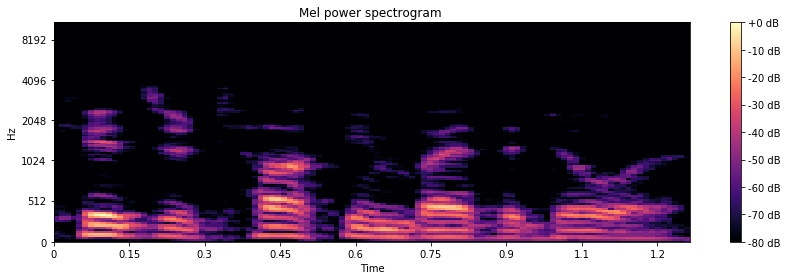

In [46]:
S_sample = librosa.feature.melspectrogram(sample_weiner, sr=sample_rate, n_mels=128,n_fft=2048,hop_length=512)

log_S_sample = librosa.amplitude_to_db(S_sample, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S_sample, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

### Mel-frequency cepstral coefficients(MFCCs)

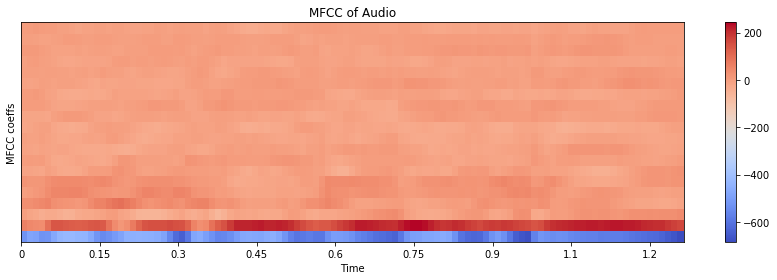

In [47]:
mfccs = librosa.feature.mfcc(sample_weiner, sr=sample_rate)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC of Audio')
plt.colorbar()
plt.tight_layout()

# Dividing The data into train and test

In [48]:
x_train=audios[(dataset_db['split']=='Train')]
y_train=dataset_db.emotion_lb[(dataset_db['split']=='Train')]

print(x_train.shape,y_train.shape)

(1200, 128, 259, 1) (1200,)


In [49]:
x_test=audios[(dataset_db['split']=='Val')]
y_test=dataset_db.emotion_lb[(dataset_db['split']=='Val')]

print(x_test.shape,y_test.shape)

(120, 128, 259, 1) (120,)


In [50]:
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)

In [51]:
lb=LabelEncoder()
y_train=np_utils.to_categorical(lb.fit_transform(y_train))
y_test=np_utils.to_categorical(lb.fit_transform(y_test))

In [52]:
x_traincnn=x_train
x_testcnn=x_test

In [53]:
x_traincnn.shape,x_testcnn.shape,y_train.shape,y_test.shape

((1200, 128, 259, 1), (120, 128, 259, 1), (1200, 14), (120, 14))

# Building the model

In [54]:
from keras.models import Sequential
from keras.layers import Conv1D,Conv2D
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import MaxPooling1D,MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense

In [55]:
num_classes=len(np.unique(np.argmax(y_train,1)))
input_shape=x_traincnn.shape[1:]
learning_rate=0.0001
decay = 1e-6
momentum=0.9

In [56]:
input_shape

(128, 259, 1)

In [57]:
model=Sequential(name='Audio_CNN_2D')

model.add(Conv2D(filters=128,kernel_size=(3,3),strides=(1,1),padding='same',data_format='channels_last',input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(4,4),strides=(4,4)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(4,4),strides=(4,4)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='same'))
model.add(BatchNormalization())
model.add(Activation('elu'))
model.add(MaxPooling2D(pool_size=(4,4),strides=(4,4)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units=num_classes,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [58]:
#Model Compilation
from keras import optimizers
opt=optimizers.Adam(lr=0.001,beta_1=0.9,beta_2=0.999,amsgrad=False)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 259, 128)     1280      
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 259, 128)     512       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 259, 128)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 129, 128)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 129, 128)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 129, 64)       73792     
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 129, 64)       256       
__________

# Training the model

In [60]:
#Train Config
from keras.callbacks import  History, ReduceLROnPlateau, CSVLogger
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
batch_size = 16
num_epochs = 100

lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)
mcp_save = ModelCheckpoint('Audio_2DCNN_4L.h5', save_best_only=True, monitor='val_categorical_accuracy', mode='max')
cnnhistory=model.fit(x_traincnn, y_train, batch_size=batch_size, epochs=num_epochs,validation_data=(x_testcnn, y_test), callbacks=[mcp_save, lr_reduce])


Instructions for updating:
Use tf.cast instead.
Train on 1200 samples, validate on 120 samples
Epoch 1/100
1200/1200 [==============================] - ETA: 17:33 - loss: 3.7197 - categorical_accuracy: 0.187 - ETA: 11:03 - loss: 4.0218 - categorical_accuracy: 0.218 - ETA: 8:57 - loss: 4.3489 - categorical_accuracy: 0.145 - ETA: 7:48 - loss: 4.1770 - categorical_accuracy: 0.12 - ETA: 7:01 - loss: 4.1359 - categorical_accuracy: 0.11 - ETA: 6:31 - loss: 4.0402 - categorical_accuracy: 0.09 - ETA: 6:07 - loss: 3.9886 - categorical_accuracy: 0.09 - ETA: 5:48 - loss: 3.9772 - categorical_accuracy: 0.09 - ETA: 5:32 - loss: 3.9274 - categorical_accuracy: 0.08 - ETA: 5:19 - loss: 3.8997 - categorical_accuracy: 0.08 - ETA: 5:08 - loss: 3.8193 - categorical_accuracy: 0.09 - ETA: 4:57 - loss: 3.7389 - categorical_accuracy: 0.09 - ETA: 4:47 - loss: 3.7517 - categorical_accuracy: 0.09 - ETA: 4:38 - loss: 3.7014 - categorical_accuracy: 0.08 - ETA: 4:31 - loss: 3.6516 - categorical_accuracy: 0.08 - ETA

1200/1200 [==============================] - ETA: 4:36 - loss: 2.9644 - categorical_accuracy: 0.06 - ETA: 4:32 - loss: 2.6266 - categorical_accuracy: 0.12 - ETA: 4:31 - loss: 2.4403 - categorical_accuracy: 0.14 - ETA: 4:30 - loss: 2.5015 - categorical_accuracy: 0.14 - ETA: 4:25 - loss: 2.6084 - categorical_accuracy: 0.12 - ETA: 4:20 - loss: 2.5783 - categorical_accuracy: 0.13 - ETA: 4:16 - loss: 2.5495 - categorical_accuracy: 0.12 - ETA: 4:13 - loss: 2.5906 - categorical_accuracy: 0.11 - ETA: 4:08 - loss: 2.5538 - categorical_accuracy: 0.12 - ETA: 4:04 - loss: 2.5309 - categorical_accuracy: 0.13 - ETA: 3:59 - loss: 2.5247 - categorical_accuracy: 0.13 - ETA: 3:56 - loss: 2.4994 - categorical_accuracy: 0.14 - ETA: 3:53 - loss: 2.4639 - categorical_accuracy: 0.13 - ETA: 3:50 - loss: 2.4664 - categorical_accuracy: 0.13 - ETA: 3:46 - loss: 2.4765 - categorical_accuracy: 0.13 - ETA: 3:42 - loss: 2.4655 - categorical_accuracy: 0.14 - ETA: 3:38 - loss: 2.4740 - categorical_accuracy: 0.14 - ETA

1200/1200 [==============================] - ETA: 4:38 - loss: 2.3663 - categorical_accuracy: 0.31 - ETA: 4:31 - loss: 2.1527 - categorical_accuracy: 0.37 - ETA: 4:28 - loss: 2.1176 - categorical_accuracy: 0.37 - ETA: 4:24 - loss: 2.1585 - categorical_accuracy: 0.35 - ETA: 4:20 - loss: 2.2436 - categorical_accuracy: 0.32 - ETA: 4:16 - loss: 2.2050 - categorical_accuracy: 0.33 - ETA: 4:12 - loss: 2.2428 - categorical_accuracy: 0.32 - ETA: 4:08 - loss: 2.2850 - categorical_accuracy: 0.30 - ETA: 4:04 - loss: 2.2811 - categorical_accuracy: 0.30 - ETA: 4:00 - loss: 2.2840 - categorical_accuracy: 0.29 - ETA: 3:56 - loss: 2.3013 - categorical_accuracy: 0.27 - ETA: 3:53 - loss: 2.3125 - categorical_accuracy: 0.27 - ETA: 3:49 - loss: 2.2835 - categorical_accuracy: 0.27 - ETA: 3:46 - loss: 2.2631 - categorical_accuracy: 0.28 - ETA: 3:43 - loss: 2.3014 - categorical_accuracy: 0.27 - ETA: 3:39 - loss: 2.3176 - categorical_accuracy: 0.25 - ETA: 3:36 - loss: 2.3165 - categorical_accuracy: 0.25 - ETA

1200/1200 [==============================] - ETA: 4:34 - loss: 1.5508 - categorical_accuracy: 0.43 - ETA: 4:30 - loss: 1.7904 - categorical_accuracy: 0.31 - ETA: 4:26 - loss: 1.9356 - categorical_accuracy: 0.29 - ETA: 4:23 - loss: 2.1430 - categorical_accuracy: 0.26 - ETA: 4:19 - loss: 2.0817 - categorical_accuracy: 0.31 - ETA: 4:15 - loss: 2.0726 - categorical_accuracy: 0.31 - ETA: 4:11 - loss: 2.0546 - categorical_accuracy: 0.33 - ETA: 4:08 - loss: 2.0776 - categorical_accuracy: 0.32 - ETA: 4:04 - loss: 2.0734 - categorical_accuracy: 0.33 - ETA: 4:01 - loss: 2.0268 - categorical_accuracy: 0.33 - ETA: 3:57 - loss: 2.0307 - categorical_accuracy: 0.32 - ETA: 3:54 - loss: 2.0645 - categorical_accuracy: 0.32 - ETA: 3:50 - loss: 2.0979 - categorical_accuracy: 0.30 - ETA: 3:47 - loss: 2.1034 - categorical_accuracy: 0.30 - ETA: 3:43 - loss: 2.1088 - categorical_accuracy: 0.30 - ETA: 3:39 - loss: 2.1470 - categorical_accuracy: 0.29 - ETA: 3:35 - loss: 2.1432 - categorical_accuracy: 0.29 - ETA

1200/1200 [==============================] - ETA: 4:38 - loss: 1.9524 - categorical_accuracy: 0.37 - ETA: 4:32 - loss: 1.8320 - categorical_accuracy: 0.34 - ETA: 4:28 - loss: 1.8261 - categorical_accuracy: 0.37 - ETA: 4:24 - loss: 1.9018 - categorical_accuracy: 0.34 - ETA: 4:20 - loss: 1.8761 - categorical_accuracy: 0.35 - ETA: 4:19 - loss: 1.9276 - categorical_accuracy: 0.32 - ETA: 4:14 - loss: 1.9815 - categorical_accuracy: 0.30 - ETA: 4:10 - loss: 1.9893 - categorical_accuracy: 0.30 - ETA: 4:06 - loss: 1.9800 - categorical_accuracy: 0.29 - ETA: 4:03 - loss: 1.9504 - categorical_accuracy: 0.30 - ETA: 3:59 - loss: 1.9395 - categorical_accuracy: 0.30 - ETA: 3:55 - loss: 1.9384 - categorical_accuracy: 0.30 - ETA: 3:51 - loss: 1.9513 - categorical_accuracy: 0.31 - ETA: 3:47 - loss: 1.9416 - categorical_accuracy: 0.31 - ETA: 3:43 - loss: 1.9227 - categorical_accuracy: 0.32 - ETA: 3:40 - loss: 1.9643 - categorical_accuracy: 0.31 - ETA: 3:36 - loss: 1.9926 - categorical_accuracy: 0.30 - ETA

1200/1200 [==============================] - ETA: 4:39 - loss: 1.8998 - categorical_accuracy: 0.37 - ETA: 4:37 - loss: 2.0867 - categorical_accuracy: 0.28 - ETA: 4:35 - loss: 2.0156 - categorical_accuracy: 0.29 - ETA: 4:31 - loss: 2.0236 - categorical_accuracy: 0.29 - ETA: 4:31 - loss: 1.9713 - categorical_accuracy: 0.32 - ETA: 4:27 - loss: 1.8320 - categorical_accuracy: 0.37 - ETA: 4:22 - loss: 1.8769 - categorical_accuracy: 0.36 - ETA: 4:17 - loss: 1.9398 - categorical_accuracy: 0.33 - ETA: 4:16 - loss: 1.9456 - categorical_accuracy: 0.34 - ETA: 4:13 - loss: 1.9318 - categorical_accuracy: 0.34 - ETA: 4:13 - loss: 1.9390 - categorical_accuracy: 0.32 - ETA: 4:12 - loss: 1.9395 - categorical_accuracy: 0.32 - ETA: 4:09 - loss: 1.9158 - categorical_accuracy: 0.34 - ETA: 4:05 - loss: 1.9159 - categorical_accuracy: 0.33 - ETA: 4:01 - loss: 1.8867 - categorical_accuracy: 0.33 - ETA: 3:58 - loss: 1.8891 - categorical_accuracy: 0.33 - ETA: 3:55 - loss: 1.8865 - categorical_accuracy: 0.34 - ETA

1200/1200 [==============================] - ETA: 4:50 - loss: 1.8009 - categorical_accuracy: 0.50 - ETA: 4:49 - loss: 1.9385 - categorical_accuracy: 0.43 - ETA: 4:49 - loss: 1.7365 - categorical_accuracy: 0.47 - ETA: 4:43 - loss: 1.7049 - categorical_accuracy: 0.46 - ETA: 4:37 - loss: 1.7569 - categorical_accuracy: 0.45 - ETA: 4:33 - loss: 1.8196 - categorical_accuracy: 0.42 - ETA: 4:28 - loss: 1.7795 - categorical_accuracy: 0.41 - ETA: 4:24 - loss: 1.7934 - categorical_accuracy: 0.42 - ETA: 4:19 - loss: 1.7743 - categorical_accuracy: 0.43 - ETA: 4:16 - loss: 1.8084 - categorical_accuracy: 0.41 - ETA: 4:12 - loss: 1.8196 - categorical_accuracy: 0.40 - ETA: 4:08 - loss: 1.7949 - categorical_accuracy: 0.41 - ETA: 4:04 - loss: 1.7937 - categorical_accuracy: 0.41 - ETA: 4:00 - loss: 1.7654 - categorical_accuracy: 0.42 - ETA: 3:55 - loss: 1.7707 - categorical_accuracy: 0.41 - ETA: 3:50 - loss: 1.7568 - categorical_accuracy: 0.42 - ETA: 3:46 - loss: 1.7510 - categorical_accuracy: 0.42 - ETA

1200/1200 [==============================] - ETA: 2:39 - loss: 1.5362 - categorical_accuracy: 0.37 - ETA: 2:40 - loss: 1.6277 - categorical_accuracy: 0.37 - ETA: 2:37 - loss: 1.5888 - categorical_accuracy: 0.35 - ETA: 2:34 - loss: 1.4977 - categorical_accuracy: 0.46 - ETA: 2:32 - loss: 1.5191 - categorical_accuracy: 0.45 - ETA: 2:30 - loss: 1.5516 - categorical_accuracy: 0.42 - ETA: 2:29 - loss: 1.5933 - categorical_accuracy: 0.42 - ETA: 2:26 - loss: 1.5867 - categorical_accuracy: 0.41 - ETA: 2:26 - loss: 1.5941 - categorical_accuracy: 0.41 - ETA: 2:23 - loss: 1.5980 - categorical_accuracy: 0.41 - ETA: 2:21 - loss: 1.5700 - categorical_accuracy: 0.43 - ETA: 2:19 - loss: 1.5596 - categorical_accuracy: 0.43 - ETA: 2:17 - loss: 1.5681 - categorical_accuracy: 0.42 - ETA: 2:17 - loss: 1.5662 - categorical_accuracy: 0.43 - ETA: 2:15 - loss: 1.6009 - categorical_accuracy: 0.42 - ETA: 2:13 - loss: 1.5869 - categorical_accuracy: 0.43 - ETA: 2:11 - loss: 1.5957 - categorical_accuracy: 0.42 - ETA

1200/1200 [==============================] - ETA: 2:42 - loss: 1.4118 - categorical_accuracy: 0.43 - ETA: 2:40 - loss: 1.5558 - categorical_accuracy: 0.50 - ETA: 2:40 - loss: 1.5846 - categorical_accuracy: 0.43 - ETA: 2:41 - loss: 1.4484 - categorical_accuracy: 0.50 - ETA: 2:37 - loss: 1.4377 - categorical_accuracy: 0.47 - ETA: 2:36 - loss: 1.5104 - categorical_accuracy: 0.44 - ETA: 2:38 - loss: 1.5300 - categorical_accuracy: 0.43 - ETA: 2:42 - loss: 1.5695 - categorical_accuracy: 0.42 - ETA: 2:38 - loss: 1.5782 - categorical_accuracy: 0.42 - ETA: 2:37 - loss: 1.5399 - categorical_accuracy: 0.43 - ETA: 2:33 - loss: 1.5431 - categorical_accuracy: 0.43 - ETA: 2:30 - loss: 1.5382 - categorical_accuracy: 0.43 - ETA: 2:28 - loss: 1.5431 - categorical_accuracy: 0.44 - ETA: 2:25 - loss: 1.5213 - categorical_accuracy: 0.45 - ETA: 2:21 - loss: 1.5330 - categorical_accuracy: 0.44 - ETA: 2:18 - loss: 1.5536 - categorical_accuracy: 0.42 - ETA: 2:16 - loss: 1.5552 - categorical_accuracy: 0.42 - ETA

1200/1200 [==============================] - ETA: 2:40 - loss: 1.2679 - categorical_accuracy: 0.56 - ETA: 2:39 - loss: 1.4516 - categorical_accuracy: 0.56 - ETA: 2:36 - loss: 1.4160 - categorical_accuracy: 0.52 - ETA: 2:34 - loss: 1.3779 - categorical_accuracy: 0.53 - ETA: 2:31 - loss: 1.6443 - categorical_accuracy: 0.46 - ETA: 2:29 - loss: 1.6314 - categorical_accuracy: 0.45 - ETA: 2:27 - loss: 1.6328 - categorical_accuracy: 0.41 - ETA: 2:25 - loss: 1.6206 - categorical_accuracy: 0.45 - ETA: 2:23 - loss: 1.6234 - categorical_accuracy: 0.45 - ETA: 2:21 - loss: 1.5989 - categorical_accuracy: 0.45 - ETA: 2:18 - loss: 1.6049 - categorical_accuracy: 0.44 - ETA: 2:16 - loss: 1.6139 - categorical_accuracy: 0.42 - ETA: 2:14 - loss: 1.5779 - categorical_accuracy: 0.44 - ETA: 2:16 - loss: 1.5644 - categorical_accuracy: 0.44 - ETA: 2:13 - loss: 1.5813 - categorical_accuracy: 0.43 - ETA: 2:11 - loss: 1.5691 - categorical_accuracy: 0.44 - ETA: 2:08 - loss: 1.5619 - categorical_accuracy: 0.44 - ETA

1200/1200 [==============================] - ETA: 2:40 - loss: 1.2144 - categorical_accuracy: 0.62 - ETA: 2:39 - loss: 1.2914 - categorical_accuracy: 0.62 - ETA: 2:39 - loss: 1.3942 - categorical_accuracy: 0.54 - ETA: 2:37 - loss: 1.4241 - categorical_accuracy: 0.51 - ETA: 2:34 - loss: 1.5134 - categorical_accuracy: 0.48 - ETA: 2:31 - loss: 1.4425 - categorical_accuracy: 0.50 - ETA: 2:29 - loss: 1.4806 - categorical_accuracy: 0.46 - ETA: 2:26 - loss: 1.5074 - categorical_accuracy: 0.43 - ETA: 2:24 - loss: 1.4532 - categorical_accuracy: 0.47 - ETA: 2:21 - loss: 1.4484 - categorical_accuracy: 0.48 - ETA: 2:20 - loss: 1.4234 - categorical_accuracy: 0.48 - ETA: 2:17 - loss: 1.4318 - categorical_accuracy: 0.48 - ETA: 2:15 - loss: 1.4587 - categorical_accuracy: 0.49 - ETA: 2:13 - loss: 1.4672 - categorical_accuracy: 0.48 - ETA: 2:13 - loss: 1.4833 - categorical_accuracy: 0.47 - ETA: 2:11 - loss: 1.5054 - categorical_accuracy: 0.46 - ETA: 2:09 - loss: 1.5031 - categorical_accuracy: 0.46 - ETA

1200/1200 [==============================] - ETA: 2:41 - loss: 1.2997 - categorical_accuracy: 0.56 - ETA: 2:40 - loss: 1.4625 - categorical_accuracy: 0.56 - ETA: 2:37 - loss: 1.3190 - categorical_accuracy: 0.60 - ETA: 2:34 - loss: 1.5078 - categorical_accuracy: 0.51 - ETA: 2:32 - loss: 1.5564 - categorical_accuracy: 0.48 - ETA: 2:31 - loss: 1.4851 - categorical_accuracy: 0.51 - ETA: 2:29 - loss: 1.4936 - categorical_accuracy: 0.50 - ETA: 2:27 - loss: 1.5045 - categorical_accuracy: 0.48 - ETA: 2:31 - loss: 1.4896 - categorical_accuracy: 0.47 - ETA: 2:28 - loss: 1.4884 - categorical_accuracy: 0.46 - ETA: 2:27 - loss: 1.4968 - categorical_accuracy: 0.47 - ETA: 2:24 - loss: 1.4684 - categorical_accuracy: 0.48 - ETA: 2:22 - loss: 1.4605 - categorical_accuracy: 0.48 - ETA: 2:19 - loss: 1.4392 - categorical_accuracy: 0.49 - ETA: 2:16 - loss: 1.4294 - categorical_accuracy: 0.49 - ETA: 2:14 - loss: 1.4405 - categorical_accuracy: 0.48 - ETA: 2:11 - loss: 1.4584 - categorical_accuracy: 0.48 - ETA

1200/1200 [==============================] - ETA: 2:40 - loss: 1.4262 - categorical_accuracy: 0.43 - ETA: 2:39 - loss: 1.4995 - categorical_accuracy: 0.40 - ETA: 2:36 - loss: 1.4197 - categorical_accuracy: 0.43 - ETA: 2:34 - loss: 1.4788 - categorical_accuracy: 0.43 - ETA: 2:32 - loss: 1.4439 - categorical_accuracy: 0.46 - ETA: 2:29 - loss: 1.4083 - categorical_accuracy: 0.45 - ETA: 2:27 - loss: 1.4431 - categorical_accuracy: 0.46 - ETA: 2:26 - loss: 1.4283 - categorical_accuracy: 0.45 - ETA: 2:23 - loss: 1.4083 - categorical_accuracy: 0.47 - ETA: 2:21 - loss: 1.4052 - categorical_accuracy: 0.47 - ETA: 2:19 - loss: 1.3768 - categorical_accuracy: 0.48 - ETA: 2:17 - loss: 1.3680 - categorical_accuracy: 0.48 - ETA: 2:16 - loss: 1.3809 - categorical_accuracy: 0.49 - ETA: 2:15 - loss: 1.3916 - categorical_accuracy: 0.48 - ETA: 2:16 - loss: 1.4038 - categorical_accuracy: 0.47 - ETA: 2:14 - loss: 1.4043 - categorical_accuracy: 0.48 - ETA: 2:14 - loss: 1.3808 - categorical_accuracy: 0.48 - ETA

1200/1200 [==============================] - ETA: 2:44 - loss: 1.1206 - categorical_accuracy: 0.56 - ETA: 3:17 - loss: 1.0501 - categorical_accuracy: 0.59 - ETA: 3:06 - loss: 1.0441 - categorical_accuracy: 0.62 - ETA: 2:58 - loss: 1.1655 - categorical_accuracy: 0.56 - ETA: 2:52 - loss: 1.1992 - categorical_accuracy: 0.57 - ETA: 2:46 - loss: 1.2274 - categorical_accuracy: 0.58 - ETA: 2:42 - loss: 1.2405 - categorical_accuracy: 0.58 - ETA: 2:40 - loss: 1.1976 - categorical_accuracy: 0.60 - ETA: 2:41 - loss: 1.2018 - categorical_accuracy: 0.59 - ETA: 2:39 - loss: 1.2485 - categorical_accuracy: 0.58 - ETA: 2:35 - loss: 1.2917 - categorical_accuracy: 0.55 - ETA: 2:32 - loss: 1.2809 - categorical_accuracy: 0.56 - ETA: 2:31 - loss: 1.3137 - categorical_accuracy: 0.54 - ETA: 2:29 - loss: 1.3303 - categorical_accuracy: 0.53 - ETA: 2:26 - loss: 1.3042 - categorical_accuracy: 0.53 - ETA: 2:22 - loss: 1.3290 - categorical_accuracy: 0.53 - ETA: 2:19 - loss: 1.3128 - categorical_accuracy: 0.54 - ETA

1200/1200 [==============================] - ETA: 3:30 - loss: 0.7763 - categorical_accuracy: 0.56 - ETA: 3:13 - loss: 1.0824 - categorical_accuracy: 0.56 - ETA: 3:02 - loss: 1.0636 - categorical_accuracy: 0.58 - ETA: 3:01 - loss: 1.1780 - categorical_accuracy: 0.54 - ETA: 2:53 - loss: 1.1314 - categorical_accuracy: 0.57 - ETA: 2:49 - loss: 1.1298 - categorical_accuracy: 0.59 - ETA: 2:44 - loss: 1.1866 - categorical_accuracy: 0.56 - ETA: 2:40 - loss: 1.2150 - categorical_accuracy: 0.55 - ETA: 2:36 - loss: 1.1868 - categorical_accuracy: 0.56 - ETA: 2:32 - loss: 1.1640 - categorical_accuracy: 0.56 - ETA: 2:29 - loss: 1.1700 - categorical_accuracy: 0.57 - ETA: 2:26 - loss: 1.1831 - categorical_accuracy: 0.56 - ETA: 2:23 - loss: 1.2059 - categorical_accuracy: 0.55 - ETA: 2:20 - loss: 1.1819 - categorical_accuracy: 0.56 - ETA: 2:17 - loss: 1.1719 - categorical_accuracy: 0.55 - ETA: 2:15 - loss: 1.1935 - categorical_accuracy: 0.55 - ETA: 2:12 - loss: 1.1669 - categorical_accuracy: 0.56 - ETA

1200/1200 [==============================] - ETA: 2:40 - loss: 0.9116 - categorical_accuracy: 0.62 - ETA: 2:38 - loss: 1.0734 - categorical_accuracy: 0.56 - ETA: 2:36 - loss: 1.0869 - categorical_accuracy: 0.58 - ETA: 2:35 - loss: 1.0645 - categorical_accuracy: 0.62 - ETA: 2:33 - loss: 1.0505 - categorical_accuracy: 0.62 - ETA: 2:30 - loss: 1.0362 - categorical_accuracy: 0.63 - ETA: 2:28 - loss: 1.0647 - categorical_accuracy: 0.63 - ETA: 2:26 - loss: 1.0399 - categorical_accuracy: 0.65 - ETA: 2:23 - loss: 1.0224 - categorical_accuracy: 0.64 - ETA: 2:21 - loss: 1.0694 - categorical_accuracy: 0.63 - ETA: 2:19 - loss: 1.0612 - categorical_accuracy: 0.64 - ETA: 2:17 - loss: 1.0530 - categorical_accuracy: 0.64 - ETA: 2:15 - loss: 1.0427 - categorical_accuracy: 0.64 - ETA: 2:12 - loss: 1.0527 - categorical_accuracy: 0.64 - ETA: 2:10 - loss: 1.0672 - categorical_accuracy: 0.62 - ETA: 2:08 - loss: 1.0869 - categorical_accuracy: 0.62 - ETA: 2:06 - loss: 1.0883 - categorical_accuracy: 0.62 - ETA

1200/1200 [==============================] - ETA: 2:41 - loss: 0.9564 - categorical_accuracy: 0.62 - ETA: 3:12 - loss: 1.0261 - categorical_accuracy: 0.50 - ETA: 2:58 - loss: 1.0840 - categorical_accuracy: 0.47 - ETA: 3:00 - loss: 1.0529 - categorical_accuracy: 0.56 - ETA: 2:56 - loss: 1.0491 - categorical_accuracy: 0.60 - ETA: 2:50 - loss: 1.0210 - categorical_accuracy: 0.59 - ETA: 2:50 - loss: 1.0201 - categorical_accuracy: 0.60 - ETA: 2:47 - loss: 1.0544 - categorical_accuracy: 0.60 - ETA: 2:42 - loss: 1.0657 - categorical_accuracy: 0.61 - ETA: 2:38 - loss: 1.1058 - categorical_accuracy: 0.60 - ETA: 2:34 - loss: 1.1461 - categorical_accuracy: 0.59 - ETA: 2:30 - loss: 1.1041 - categorical_accuracy: 0.60 - ETA: 2:27 - loss: 1.0897 - categorical_accuracy: 0.61 - ETA: 2:26 - loss: 1.0762 - categorical_accuracy: 0.62 - ETA: 2:24 - loss: 1.0750 - categorical_accuracy: 0.62 - ETA: 2:21 - loss: 1.0795 - categorical_accuracy: 0.62 - ETA: 2:18 - loss: 1.0867 - categorical_accuracy: 0.62 - ETA

1200/1200 [==============================] - ETA: 2:44 - loss: 1.1047 - categorical_accuracy: 0.50 - ETA: 3:14 - loss: 0.9472 - categorical_accuracy: 0.56 - ETA: 3:00 - loss: 0.7995 - categorical_accuracy: 0.64 - ETA: 2:58 - loss: 0.7897 - categorical_accuracy: 0.65 - ETA: 2:51 - loss: 0.8572 - categorical_accuracy: 0.65 - ETA: 2:45 - loss: 0.9328 - categorical_accuracy: 0.61 - ETA: 2:40 - loss: 0.9741 - categorical_accuracy: 0.61 - ETA: 2:37 - loss: 0.9427 - categorical_accuracy: 0.64 - ETA: 2:33 - loss: 0.9669 - categorical_accuracy: 0.64 - ETA: 2:30 - loss: 0.9582 - categorical_accuracy: 0.65 - ETA: 2:27 - loss: 0.9708 - categorical_accuracy: 0.65 - ETA: 2:24 - loss: 0.9946 - categorical_accuracy: 0.65 - ETA: 2:21 - loss: 0.9887 - categorical_accuracy: 0.64 - ETA: 2:18 - loss: 0.9822 - categorical_accuracy: 0.64 - ETA: 2:16 - loss: 0.9978 - categorical_accuracy: 0.63 - ETA: 2:13 - loss: 0.9939 - categorical_accuracy: 0.64 - ETA: 2:10 - loss: 0.9958 - categorical_accuracy: 0.63 - ETA

1200/1200 [==============================] - ETA: 2:43 - loss: 1.3953 - categorical_accuracy: 0.56 - ETA: 3:14 - loss: 1.3870 - categorical_accuracy: 0.53 - ETA: 3:00 - loss: 1.2182 - categorical_accuracy: 0.58 - ETA: 3:02 - loss: 1.1798 - categorical_accuracy: 0.57 - ETA: 2:57 - loss: 1.1141 - categorical_accuracy: 0.60 - ETA: 2:50 - loss: 1.1366 - categorical_accuracy: 0.59 - ETA: 2:48 - loss: 1.1172 - categorical_accuracy: 0.58 - ETA: 2:43 - loss: 1.0723 - categorical_accuracy: 0.60 - ETA: 2:39 - loss: 1.0881 - categorical_accuracy: 0.59 - ETA: 2:35 - loss: 1.0911 - categorical_accuracy: 0.60 - ETA: 2:31 - loss: 1.0725 - categorical_accuracy: 0.62 - ETA: 2:28 - loss: 1.0532 - categorical_accuracy: 0.63 - ETA: 2:25 - loss: 1.0561 - categorical_accuracy: 0.61 - ETA: 2:22 - loss: 1.0904 - categorical_accuracy: 0.61 - ETA: 2:19 - loss: 1.1207 - categorical_accuracy: 0.60 - ETA: 2:16 - loss: 1.0913 - categorical_accuracy: 0.60 - ETA: 2:15 - loss: 1.0772 - categorical_accuracy: 0.61 - ETA

1200/1200 [==============================] - ETA: 2:40 - loss: 1.0837 - categorical_accuracy: 0.56 - ETA: 2:39 - loss: 0.8616 - categorical_accuracy: 0.68 - ETA: 2:37 - loss: 0.8610 - categorical_accuracy: 0.68 - ETA: 2:35 - loss: 0.9084 - categorical_accuracy: 0.68 - ETA: 2:32 - loss: 0.9220 - categorical_accuracy: 0.67 - ETA: 2:30 - loss: 0.9286 - categorical_accuracy: 0.67 - ETA: 2:28 - loss: 0.9204 - categorical_accuracy: 0.67 - ETA: 2:25 - loss: 0.9190 - categorical_accuracy: 0.66 - ETA: 2:23 - loss: 0.9254 - categorical_accuracy: 0.66 - ETA: 2:25 - loss: 0.9039 - categorical_accuracy: 0.67 - ETA: 2:24 - loss: 0.8771 - categorical_accuracy: 0.69 - ETA: 2:21 - loss: 0.8750 - categorical_accuracy: 0.69 - ETA: 2:18 - loss: 0.8847 - categorical_accuracy: 0.67 - ETA: 2:18 - loss: 0.9018 - categorical_accuracy: 0.66 - ETA: 2:15 - loss: 0.8970 - categorical_accuracy: 0.67 - ETA: 2:12 - loss: 0.8976 - categorical_accuracy: 0.67 - ETA: 2:10 - loss: 0.9032 - categorical_accuracy: 0.66 - ETA

1200/1200 [==============================] - ETA: 2:40 - loss: 0.7161 - categorical_accuracy: 0.81 - ETA: 2:52 - loss: 0.9235 - categorical_accuracy: 0.65 - ETA: 2:45 - loss: 1.0979 - categorical_accuracy: 0.60 - ETA: 2:40 - loss: 1.0435 - categorical_accuracy: 0.59 - ETA: 2:38 - loss: 0.9679 - categorical_accuracy: 0.63 - ETA: 2:35 - loss: 1.0500 - categorical_accuracy: 0.60 - ETA: 2:32 - loss: 1.0292 - categorical_accuracy: 0.61 - ETA: 2:29 - loss: 1.0279 - categorical_accuracy: 0.62 - ETA: 2:26 - loss: 1.0101 - categorical_accuracy: 0.63 - ETA: 2:28 - loss: 1.0057 - categorical_accuracy: 0.63 - ETA: 2:26 - loss: 0.9534 - categorical_accuracy: 0.65 - ETA: 2:24 - loss: 0.9557 - categorical_accuracy: 0.64 - ETA: 2:24 - loss: 0.9755 - categorical_accuracy: 0.63 - ETA: 2:22 - loss: 0.9689 - categorical_accuracy: 0.63 - ETA: 2:19 - loss: 0.9702 - categorical_accuracy: 0.64 - ETA: 2:16 - loss: 0.9710 - categorical_accuracy: 0.62 - ETA: 2:13 - loss: 0.9853 - categorical_accuracy: 0.61 - ETA

1200/1200 [==============================] - ETA: 2:42 - loss: 0.8602 - categorical_accuracy: 0.75 - ETA: 3:14 - loss: 0.7745 - categorical_accuracy: 0.78 - ETA: 3:02 - loss: 0.8542 - categorical_accuracy: 0.72 - ETA: 2:54 - loss: 0.8412 - categorical_accuracy: 0.68 - ETA: 2:48 - loss: 0.8181 - categorical_accuracy: 0.67 - ETA: 2:43 - loss: 0.8008 - categorical_accuracy: 0.69 - ETA: 2:39 - loss: 0.7751 - categorical_accuracy: 0.71 - ETA: 2:35 - loss: 0.7698 - categorical_accuracy: 0.71 - ETA: 2:32 - loss: 0.7529 - categorical_accuracy: 0.72 - ETA: 2:29 - loss: 0.7808 - categorical_accuracy: 0.71 - ETA: 2:26 - loss: 0.7963 - categorical_accuracy: 0.70 - ETA: 2:26 - loss: 0.8280 - categorical_accuracy: 0.68 - ETA: 2:24 - loss: 0.8345 - categorical_accuracy: 0.68 - ETA: 2:21 - loss: 0.8399 - categorical_accuracy: 0.68 - ETA: 2:18 - loss: 0.8503 - categorical_accuracy: 0.67 - ETA: 2:16 - loss: 0.8569 - categorical_accuracy: 0.67 - ETA: 2:15 - loss: 0.8632 - categorical_accuracy: 0.67 - ETA

1200/1200 [==============================] - ETA: 2:42 - loss: 1.2125 - categorical_accuracy: 0.62 - ETA: 3:13 - loss: 1.0240 - categorical_accuracy: 0.62 - ETA: 2:59 - loss: 0.9593 - categorical_accuracy: 0.64 - ETA: 3:02 - loss: 0.8510 - categorical_accuracy: 0.70 - ETA: 2:56 - loss: 0.7885 - categorical_accuracy: 0.72 - ETA: 2:50 - loss: 0.8002 - categorical_accuracy: 0.72 - ETA: 2:50 - loss: 0.7913 - categorical_accuracy: 0.72 - ETA: 2:47 - loss: 0.8064 - categorical_accuracy: 0.71 - ETA: 2:42 - loss: 0.7985 - categorical_accuracy: 0.71 - ETA: 2:38 - loss: 0.7818 - categorical_accuracy: 0.73 - ETA: 2:36 - loss: 0.8029 - categorical_accuracy: 0.71 - ETA: 2:32 - loss: 0.8428 - categorical_accuracy: 0.70 - ETA: 2:29 - loss: 0.8370 - categorical_accuracy: 0.70 - ETA: 2:25 - loss: 0.8174 - categorical_accuracy: 0.71 - ETA: 2:22 - loss: 0.8321 - categorical_accuracy: 0.70 - ETA: 2:19 - loss: 0.8380 - categorical_accuracy: 0.70 - ETA: 2:17 - loss: 0.8369 - categorical_accuracy: 0.69 - ETA

1200/1200 [==============================] - ETA: 2:43 - loss: 1.5647 - categorical_accuracy: 0.56 - ETA: 2:39 - loss: 1.0429 - categorical_accuracy: 0.68 - ETA: 2:36 - loss: 1.0699 - categorical_accuracy: 0.64 - ETA: 2:34 - loss: 0.9274 - categorical_accuracy: 0.70 - ETA: 2:31 - loss: 0.9861 - categorical_accuracy: 0.67 - ETA: 2:29 - loss: 0.9532 - categorical_accuracy: 0.65 - ETA: 2:27 - loss: 0.9272 - categorical_accuracy: 0.66 - ETA: 2:30 - loss: 0.8859 - categorical_accuracy: 0.67 - ETA: 2:29 - loss: 0.9216 - categorical_accuracy: 0.68 - ETA: 2:26 - loss: 0.9265 - categorical_accuracy: 0.68 - ETA: 2:23 - loss: 0.8999 - categorical_accuracy: 0.70 - ETA: 2:23 - loss: 0.8917 - categorical_accuracy: 0.70 - ETA: 2:20 - loss: 0.8800 - categorical_accuracy: 0.70 - ETA: 2:17 - loss: 0.8554 - categorical_accuracy: 0.71 - ETA: 2:18 - loss: 0.8334 - categorical_accuracy: 0.72 - ETA: 2:15 - loss: 0.8321 - categorical_accuracy: 0.72 - ETA: 2:13 - loss: 0.8398 - categorical_accuracy: 0.72 - ETA

1200/1200 [==============================] - ETA: 2:41 - loss: 0.4640 - categorical_accuracy: 0.93 - ETA: 2:39 - loss: 0.5585 - categorical_accuracy: 0.90 - ETA: 2:36 - loss: 0.6583 - categorical_accuracy: 0.81 - ETA: 2:35 - loss: 0.6446 - categorical_accuracy: 0.84 - ETA: 2:32 - loss: 0.6533 - categorical_accuracy: 0.81 - ETA: 2:30 - loss: 0.7322 - categorical_accuracy: 0.80 - ETA: 2:28 - loss: 0.7944 - categorical_accuracy: 0.76 - ETA: 2:25 - loss: 0.8169 - categorical_accuracy: 0.75 - ETA: 2:23 - loss: 0.8115 - categorical_accuracy: 0.74 - ETA: 2:25 - loss: 0.7943 - categorical_accuracy: 0.75 - ETA: 2:24 - loss: 0.8057 - categorical_accuracy: 0.74 - ETA: 2:21 - loss: 0.7943 - categorical_accuracy: 0.74 - ETA: 2:21 - loss: 0.7820 - categorical_accuracy: 0.74 - ETA: 2:20 - loss: 0.8352 - categorical_accuracy: 0.71 - ETA: 2:17 - loss: 0.8537 - categorical_accuracy: 0.70 - ETA: 2:14 - loss: 0.8619 - categorical_accuracy: 0.68 - ETA: 2:11 - loss: 0.8609 - categorical_accuracy: 0.68 - ETA

1200/1200 [==============================] - ETA: 4:35 - loss: 0.6021 - categorical_accuracy: 0.87 - ETA: 4:30 - loss: 0.6825 - categorical_accuracy: 0.78 - ETA: 4:27 - loss: 0.6712 - categorical_accuracy: 0.79 - ETA: 4:22 - loss: 0.7429 - categorical_accuracy: 0.73 - ETA: 4:18 - loss: 0.6944 - categorical_accuracy: 0.75 - ETA: 4:14 - loss: 0.7042 - categorical_accuracy: 0.73 - ETA: 4:11 - loss: 0.6602 - categorical_accuracy: 0.75 - ETA: 4:07 - loss: 0.6918 - categorical_accuracy: 0.74 - ETA: 4:03 - loss: 0.7427 - categorical_accuracy: 0.71 - ETA: 4:00 - loss: 0.7359 - categorical_accuracy: 0.71 - ETA: 3:56 - loss: 0.7120 - categorical_accuracy: 0.73 - ETA: 3:53 - loss: 0.6812 - categorical_accuracy: 0.75 - ETA: 3:49 - loss: 0.7032 - categorical_accuracy: 0.73 - ETA: 3:45 - loss: 0.6972 - categorical_accuracy: 0.74 - ETA: 3:41 - loss: 0.7122 - categorical_accuracy: 0.74 - ETA: 3:38 - loss: 0.7045 - categorical_accuracy: 0.74 - ETA: 3:34 - loss: 0.7289 - categorical_accuracy: 0.72 - ETA

1200/1200 [==============================] - ETA: 4:37 - loss: 0.7748 - categorical_accuracy: 0.62 - ETA: 4:31 - loss: 0.6418 - categorical_accuracy: 0.71 - ETA: 4:29 - loss: 0.7653 - categorical_accuracy: 0.64 - ETA: 4:26 - loss: 0.7959 - categorical_accuracy: 0.62 - ETA: 4:22 - loss: 0.7515 - categorical_accuracy: 0.67 - ETA: 4:17 - loss: 0.7918 - categorical_accuracy: 0.66 - ETA: 4:13 - loss: 0.7796 - categorical_accuracy: 0.65 - ETA: 4:10 - loss: 0.7749 - categorical_accuracy: 0.64 - ETA: 4:06 - loss: 0.7583 - categorical_accuracy: 0.65 - ETA: 4:02 - loss: 0.7827 - categorical_accuracy: 0.65 - ETA: 3:58 - loss: 0.7747 - categorical_accuracy: 0.65 - ETA: 3:54 - loss: 0.7550 - categorical_accuracy: 0.67 - ETA: 3:50 - loss: 0.7482 - categorical_accuracy: 0.67 - ETA: 3:52 - loss: 0.7546 - categorical_accuracy: 0.68 - ETA: 3:48 - loss: 0.7638 - categorical_accuracy: 0.68 - ETA: 3:43 - loss: 0.7560 - categorical_accuracy: 0.69 - ETA: 3:39 - loss: 0.7483 - categorical_accuracy: 0.69 - ETA

1200/1200 [==============================] - ETA: 4:37 - loss: 0.8604 - categorical_accuracy: 0.68 - ETA: 4:31 - loss: 0.6505 - categorical_accuracy: 0.81 - ETA: 4:27 - loss: 0.7263 - categorical_accuracy: 0.75 - ETA: 4:22 - loss: 0.6632 - categorical_accuracy: 0.75 - ETA: 4:19 - loss: 0.6656 - categorical_accuracy: 0.76 - ETA: 4:16 - loss: 0.6276 - categorical_accuracy: 0.77 - ETA: 4:12 - loss: 0.6596 - categorical_accuracy: 0.75 - ETA: 4:08 - loss: 0.6476 - categorical_accuracy: 0.75 - ETA: 4:04 - loss: 0.6591 - categorical_accuracy: 0.76 - ETA: 4:01 - loss: 0.6940 - categorical_accuracy: 0.74 - ETA: 3:57 - loss: 0.6672 - categorical_accuracy: 0.75 - ETA: 3:53 - loss: 0.6601 - categorical_accuracy: 0.76 - ETA: 3:49 - loss: 0.6420 - categorical_accuracy: 0.76 - ETA: 3:46 - loss: 0.6277 - categorical_accuracy: 0.77 - ETA: 3:42 - loss: 0.6328 - categorical_accuracy: 0.77 - ETA: 3:38 - loss: 0.6538 - categorical_accuracy: 0.75 - ETA: 3:34 - loss: 0.6484 - categorical_accuracy: 0.75 - ETA

1200/1200 [==============================] - ETA: 2:56 - loss: 0.6960 - categorical_accuracy: 0.75 - ETA: 2:52 - loss: 0.5558 - categorical_accuracy: 0.84 - ETA: 2:48 - loss: 0.7080 - categorical_accuracy: 0.79 - ETA: 2:45 - loss: 0.7011 - categorical_accuracy: 0.78 - ETA: 2:44 - loss: 0.6316 - categorical_accuracy: 0.81 - ETA: 2:41 - loss: 0.6489 - categorical_accuracy: 0.81 - ETA: 2:38 - loss: 0.6824 - categorical_accuracy: 0.78 - ETA: 2:34 - loss: 0.6906 - categorical_accuracy: 0.78 - ETA: 2:32 - loss: 0.7046 - categorical_accuracy: 0.77 - ETA: 2:29 - loss: 0.6927 - categorical_accuracy: 0.77 - ETA: 2:26 - loss: 0.6850 - categorical_accuracy: 0.77 - ETA: 2:23 - loss: 0.6717 - categorical_accuracy: 0.78 - ETA: 2:21 - loss: 0.6619 - categorical_accuracy: 0.77 - ETA: 2:18 - loss: 0.6559 - categorical_accuracy: 0.78 - ETA: 2:16 - loss: 0.6514 - categorical_accuracy: 0.78 - ETA: 2:14 - loss: 0.6521 - categorical_accuracy: 0.78 - ETA: 2:11 - loss: 0.6452 - categorical_accuracy: 0.78 - ETA

1200/1200 [==============================] - ETA: 2:57 - loss: 0.4839 - categorical_accuracy: 0.87 - ETA: 2:55 - loss: 0.5169 - categorical_accuracy: 0.84 - ETA: 2:52 - loss: 0.4651 - categorical_accuracy: 0.87 - ETA: 2:50 - loss: 0.4199 - categorical_accuracy: 0.89 - ETA: 2:47 - loss: 0.4381 - categorical_accuracy: 0.86 - ETA: 2:45 - loss: 0.5007 - categorical_accuracy: 0.84 - ETA: 2:43 - loss: 0.4943 - categorical_accuracy: 0.84 - ETA: 2:41 - loss: 0.5187 - categorical_accuracy: 0.84 - ETA: 2:38 - loss: 0.5224 - categorical_accuracy: 0.84 - ETA: 2:36 - loss: 0.5339 - categorical_accuracy: 0.83 - ETA: 2:34 - loss: 0.5574 - categorical_accuracy: 0.82 - ETA: 2:31 - loss: 0.5787 - categorical_accuracy: 0.80 - ETA: 2:29 - loss: 0.5969 - categorical_accuracy: 0.79 - ETA: 2:26 - loss: 0.5859 - categorical_accuracy: 0.80 - ETA: 2:24 - loss: 0.5736 - categorical_accuracy: 0.81 - ETA: 2:22 - loss: 0.5756 - categorical_accuracy: 0.81 - ETA: 2:19 - loss: 0.5788 - categorical_accuracy: 0.80 - ETA

1200/1200 [==============================] - ETA: 2:57 - loss: 0.7834 - categorical_accuracy: 0.75 - ETA: 2:57 - loss: 0.5397 - categorical_accuracy: 0.81 - ETA: 2:54 - loss: 0.6602 - categorical_accuracy: 0.77 - ETA: 2:51 - loss: 0.6763 - categorical_accuracy: 0.75 - ETA: 2:48 - loss: 0.6223 - categorical_accuracy: 0.77 - ETA: 2:46 - loss: 0.5792 - categorical_accuracy: 0.78 - ETA: 2:43 - loss: 0.5556 - categorical_accuracy: 0.79 - ETA: 2:41 - loss: 0.5355 - categorical_accuracy: 0.80 - ETA: 2:39 - loss: 0.5235 - categorical_accuracy: 0.80 - ETA: 2:36 - loss: 0.5336 - categorical_accuracy: 0.80 - ETA: 2:34 - loss: 0.5857 - categorical_accuracy: 0.78 - ETA: 2:31 - loss: 0.5803 - categorical_accuracy: 0.79 - ETA: 2:29 - loss: 0.5862 - categorical_accuracy: 0.78 - ETA: 2:26 - loss: 0.5845 - categorical_accuracy: 0.79 - ETA: 2:24 - loss: 0.5617 - categorical_accuracy: 0.79 - ETA: 2:22 - loss: 0.5517 - categorical_accuracy: 0.79 - ETA: 2:19 - loss: 0.5508 - categorical_accuracy: 0.80 - ETA

1200/1200 [==============================] - ETA: 2:59 - loss: 0.5505 - categorical_accuracy: 0.87 - ETA: 2:56 - loss: 0.5519 - categorical_accuracy: 0.84 - ETA: 2:52 - loss: 0.5214 - categorical_accuracy: 0.81 - ETA: 2:52 - loss: 0.4948 - categorical_accuracy: 0.82 - ETA: 2:49 - loss: 0.5031 - categorical_accuracy: 0.83 - ETA: 2:46 - loss: 0.5003 - categorical_accuracy: 0.84 - ETA: 2:43 - loss: 0.4572 - categorical_accuracy: 0.86 - ETA: 2:41 - loss: 0.4543 - categorical_accuracy: 0.86 - ETA: 2:38 - loss: 0.4701 - categorical_accuracy: 0.85 - ETA: 2:36 - loss: 0.4698 - categorical_accuracy: 0.84 - ETA: 2:34 - loss: 0.4846 - categorical_accuracy: 0.83 - ETA: 2:31 - loss: 0.5028 - categorical_accuracy: 0.81 - ETA: 2:29 - loss: 0.5174 - categorical_accuracy: 0.80 - ETA: 2:26 - loss: 0.5061 - categorical_accuracy: 0.80 - ETA: 2:24 - loss: 0.5200 - categorical_accuracy: 0.81 - ETA: 2:22 - loss: 0.5287 - categorical_accuracy: 0.80 - ETA: 2:19 - loss: 0.5281 - categorical_accuracy: 0.80 - ETA

1200/1200 [==============================] - ETA: 2:56 - loss: 0.7363 - categorical_accuracy: 0.75 - ETA: 2:55 - loss: 0.4703 - categorical_accuracy: 0.87 - ETA: 2:52 - loss: 0.4819 - categorical_accuracy: 0.83 - ETA: 2:50 - loss: 0.5356 - categorical_accuracy: 0.82 - ETA: 2:47 - loss: 0.4979 - categorical_accuracy: 0.85 - ETA: 2:46 - loss: 0.5303 - categorical_accuracy: 0.81 - ETA: 2:43 - loss: 0.5732 - categorical_accuracy: 0.79 - ETA: 2:41 - loss: 0.5440 - categorical_accuracy: 0.80 - ETA: 2:38 - loss: 0.5170 - categorical_accuracy: 0.81 - ETA: 2:36 - loss: 0.5326 - categorical_accuracy: 0.81 - ETA: 2:33 - loss: 0.5299 - categorical_accuracy: 0.81 - ETA: 2:31 - loss: 0.5185 - categorical_accuracy: 0.81 - ETA: 2:29 - loss: 0.5438 - categorical_accuracy: 0.80 - ETA: 2:26 - loss: 0.5524 - categorical_accuracy: 0.79 - ETA: 2:24 - loss: 0.5493 - categorical_accuracy: 0.79 - ETA: 2:21 - loss: 0.5374 - categorical_accuracy: 0.80 - ETA: 2:19 - loss: 0.5324 - categorical_accuracy: 0.81 - ETA

1200/1200 [==============================] - ETA: 4:18 - loss: 0.3527 - categorical_accuracy: 0.87 - ETA: 4:27 - loss: 0.3964 - categorical_accuracy: 0.84 - ETA: 4:20 - loss: 0.5077 - categorical_accuracy: 0.81 - ETA: 4:11 - loss: 0.5694 - categorical_accuracy: 0.75 - ETA: 4:04 - loss: 0.5272 - categorical_accuracy: 0.78 - ETA: 4:01 - loss: 0.4878 - categorical_accuracy: 0.81 - ETA: 4:01 - loss: 0.4756 - categorical_accuracy: 0.81 - ETA: 3:56 - loss: 0.4858 - categorical_accuracy: 0.82 - ETA: 3:50 - loss: 0.4933 - categorical_accuracy: 0.81 - ETA: 3:47 - loss: 0.5072 - categorical_accuracy: 0.82 - ETA: 3:44 - loss: 0.4980 - categorical_accuracy: 0.82 - ETA: 3:39 - loss: 0.4937 - categorical_accuracy: 0.82 - ETA: 3:36 - loss: 0.5053 - categorical_accuracy: 0.82 - ETA: 3:33 - loss: 0.4985 - categorical_accuracy: 0.82 - ETA: 3:30 - loss: 0.4912 - categorical_accuracy: 0.82 - ETA: 3:27 - loss: 0.4957 - categorical_accuracy: 0.82 - ETA: 3:23 - loss: 0.5268 - categorical_accuracy: 0.80 - ETA

1200/1200 [==============================] - ETA: 2:39 - loss: 0.4321 - categorical_accuracy: 0.81 - ETA: 2:37 - loss: 0.5206 - categorical_accuracy: 0.75 - ETA: 2:38 - loss: 0.4510 - categorical_accuracy: 0.81 - ETA: 2:37 - loss: 0.4705 - categorical_accuracy: 0.82 - ETA: 2:35 - loss: 0.4608 - categorical_accuracy: 0.82 - ETA: 2:32 - loss: 0.4601 - categorical_accuracy: 0.83 - ETA: 2:48 - loss: 0.4273 - categorical_accuracy: 0.85 - ETA: 2:46 - loss: 0.4153 - categorical_accuracy: 0.85 - ETA: 2:42 - loss: 0.4194 - categorical_accuracy: 0.84 - ETA: 2:38 - loss: 0.4214 - categorical_accuracy: 0.85 - ETA: 2:35 - loss: 0.4364 - categorical_accuracy: 0.83 - ETA: 2:31 - loss: 0.4550 - categorical_accuracy: 0.82 - ETA: 2:27 - loss: 0.4775 - categorical_accuracy: 0.81 - ETA: 2:25 - loss: 0.4772 - categorical_accuracy: 0.80 - ETA: 2:21 - loss: 0.4832 - categorical_accuracy: 0.80 - ETA: 2:18 - loss: 0.4930 - categorical_accuracy: 0.79 - ETA: 2:15 - loss: 0.5016 - categorical_accuracy: 0.79 - ETA

1200/1200 [==============================] - ETA: 2:40 - loss: 0.1485 - categorical_accuracy: 0.93 - ETA: 2:37 - loss: 0.3008 - categorical_accuracy: 0.84 - ETA: 2:35 - loss: 0.3193 - categorical_accuracy: 0.87 - ETA: 2:34 - loss: 0.3208 - categorical_accuracy: 0.89 - ETA: 2:31 - loss: 0.3089 - categorical_accuracy: 0.90 - ETA: 2:29 - loss: 0.3442 - categorical_accuracy: 0.88 - ETA: 2:28 - loss: 0.3530 - categorical_accuracy: 0.88 - ETA: 2:26 - loss: 0.3751 - categorical_accuracy: 0.87 - ETA: 2:23 - loss: 0.3619 - categorical_accuracy: 0.87 - ETA: 2:21 - loss: 0.4041 - categorical_accuracy: 0.86 - ETA: 2:19 - loss: 0.3968 - categorical_accuracy: 0.86 - ETA: 2:17 - loss: 0.4043 - categorical_accuracy: 0.87 - ETA: 2:14 - loss: 0.4036 - categorical_accuracy: 0.87 - ETA: 2:12 - loss: 0.4048 - categorical_accuracy: 0.86 - ETA: 2:10 - loss: 0.4021 - categorical_accuracy: 0.86 - ETA: 2:08 - loss: 0.4055 - categorical_accuracy: 0.86 - ETA: 2:06 - loss: 0.4091 - categorical_accuracy: 0.86 - ETA

1200/1200 [==============================] - ETA: 2:40 - loss: 0.1797 - categorical_accuracy: 0.93 - ETA: 2:37 - loss: 0.3034 - categorical_accuracy: 0.87 - ETA: 2:35 - loss: 0.3887 - categorical_accuracy: 0.85 - ETA: 2:34 - loss: 0.4251 - categorical_accuracy: 0.85 - ETA: 2:32 - loss: 0.3972 - categorical_accuracy: 0.87 - ETA: 2:29 - loss: 0.3754 - categorical_accuracy: 0.87 - ETA: 2:27 - loss: 0.3685 - categorical_accuracy: 0.87 - ETA: 2:25 - loss: 0.3769 - categorical_accuracy: 0.87 - ETA: 2:23 - loss: 0.3829 - categorical_accuracy: 0.86 - ETA: 2:20 - loss: 0.4011 - categorical_accuracy: 0.86 - ETA: 2:18 - loss: 0.3917 - categorical_accuracy: 0.86 - ETA: 2:16 - loss: 0.4126 - categorical_accuracy: 0.85 - ETA: 2:14 - loss: 0.4025 - categorical_accuracy: 0.86 - ETA: 2:12 - loss: 0.4104 - categorical_accuracy: 0.84 - ETA: 2:10 - loss: 0.4131 - categorical_accuracy: 0.85 - ETA: 2:08 - loss: 0.4150 - categorical_accuracy: 0.84 - ETA: 2:05 - loss: 0.4203 - categorical_accuracy: 0.83 - ETA

1200/1200 [==============================] - ETA: 2:40 - loss: 0.3852 - categorical_accuracy: 0.87 - ETA: 2:40 - loss: 0.4358 - categorical_accuracy: 0.87 - ETA: 2:37 - loss: 0.4283 - categorical_accuracy: 0.87 - ETA: 2:34 - loss: 0.4343 - categorical_accuracy: 0.85 - ETA: 2:32 - loss: 0.4015 - categorical_accuracy: 0.87 - ETA: 2:30 - loss: 0.3618 - categorical_accuracy: 0.89 - ETA: 2:27 - loss: 0.3489 - categorical_accuracy: 0.90 - ETA: 2:25 - loss: 0.3765 - categorical_accuracy: 0.89 - ETA: 2:23 - loss: 0.3831 - categorical_accuracy: 0.88 - ETA: 2:21 - loss: 0.3749 - categorical_accuracy: 0.88 - ETA: 2:19 - loss: 0.3756 - categorical_accuracy: 0.89 - ETA: 2:16 - loss: 0.3809 - categorical_accuracy: 0.88 - ETA: 2:14 - loss: 0.3920 - categorical_accuracy: 0.87 - ETA: 2:12 - loss: 0.3739 - categorical_accuracy: 0.88 - ETA: 2:10 - loss: 0.3657 - categorical_accuracy: 0.88 - ETA: 2:08 - loss: 0.3732 - categorical_accuracy: 0.88 - ETA: 2:06 - loss: 0.3677 - categorical_accuracy: 0.87 - ETA

1200/1200 [==============================] - ETA: 2:39 - loss: 0.4310 - categorical_accuracy: 0.81 - ETA: 2:37 - loss: 0.4233 - categorical_accuracy: 0.84 - ETA: 2:35 - loss: 0.3948 - categorical_accuracy: 0.85 - ETA: 2:34 - loss: 0.3340 - categorical_accuracy: 0.89 - ETA: 2:32 - loss: 0.3297 - categorical_accuracy: 0.88 - ETA: 2:30 - loss: 0.2984 - categorical_accuracy: 0.90 - ETA: 2:27 - loss: 0.3193 - categorical_accuracy: 0.88 - ETA: 2:25 - loss: 0.3358 - categorical_accuracy: 0.87 - ETA: 2:23 - loss: 0.3265 - categorical_accuracy: 0.87 - ETA: 2:21 - loss: 0.3396 - categorical_accuracy: 0.87 - ETA: 2:18 - loss: 0.3231 - categorical_accuracy: 0.88 - ETA: 2:17 - loss: 0.3072 - categorical_accuracy: 0.89 - ETA: 2:14 - loss: 0.3196 - categorical_accuracy: 0.88 - ETA: 2:12 - loss: 0.3209 - categorical_accuracy: 0.88 - ETA: 2:10 - loss: 0.3292 - categorical_accuracy: 0.88 - ETA: 2:08 - loss: 0.3410 - categorical_accuracy: 0.87 - ETA: 2:05 - loss: 0.3374 - categorical_accuracy: 0.88 - ETA

1200/1200 [==============================] - ETA: 2:46 - loss: 0.3161 - categorical_accuracy: 0.81 - ETA: 2:41 - loss: 0.3349 - categorical_accuracy: 0.81 - ETA: 2:37 - loss: 0.3641 - categorical_accuracy: 0.83 - ETA: 2:34 - loss: 0.4105 - categorical_accuracy: 0.84 - ETA: 2:32 - loss: 0.4215 - categorical_accuracy: 0.82 - ETA: 2:30 - loss: 0.4278 - categorical_accuracy: 0.82 - ETA: 2:27 - loss: 0.4468 - categorical_accuracy: 0.81 - ETA: 2:25 - loss: 0.4486 - categorical_accuracy: 0.81 - ETA: 2:23 - loss: 0.4324 - categorical_accuracy: 0.82 - ETA: 2:21 - loss: 0.4478 - categorical_accuracy: 0.82 - ETA: 2:19 - loss: 0.4299 - categorical_accuracy: 0.83 - ETA: 2:17 - loss: 0.4243 - categorical_accuracy: 0.83 - ETA: 2:15 - loss: 0.4205 - categorical_accuracy: 0.84 - ETA: 2:12 - loss: 0.4151 - categorical_accuracy: 0.85 - ETA: 2:10 - loss: 0.4054 - categorical_accuracy: 0.85 - ETA: 2:08 - loss: 0.3993 - categorical_accuracy: 0.85 - ETA: 2:06 - loss: 0.4120 - categorical_accuracy: 0.84 - ETA

1200/1200 [==============================] - ETA: 2:40 - loss: 0.6149 - categorical_accuracy: 0.68 - ETA: 2:38 - loss: 0.4658 - categorical_accuracy: 0.78 - ETA: 2:36 - loss: 0.3989 - categorical_accuracy: 0.79 - ETA: 2:33 - loss: 0.3722 - categorical_accuracy: 0.81 - ETA: 2:33 - loss: 0.3619 - categorical_accuracy: 0.82 - ETA: 2:30 - loss: 0.3418 - categorical_accuracy: 0.85 - ETA: 2:29 - loss: 0.3254 - categorical_accuracy: 0.86 - ETA: 2:27 - loss: 0.3302 - categorical_accuracy: 0.86 - ETA: 2:25 - loss: 0.3265 - categorical_accuracy: 0.87 - ETA: 2:22 - loss: 0.3210 - categorical_accuracy: 0.88 - ETA: 2:20 - loss: 0.3292 - categorical_accuracy: 0.87 - ETA: 2:18 - loss: 0.3292 - categorical_accuracy: 0.87 - ETA: 2:16 - loss: 0.3416 - categorical_accuracy: 0.87 - ETA: 2:14 - loss: 0.3265 - categorical_accuracy: 0.87 - ETA: 2:12 - loss: 0.3306 - categorical_accuracy: 0.86 - ETA: 2:09 - loss: 0.3232 - categorical_accuracy: 0.86 - ETA: 2:07 - loss: 0.3140 - categorical_accuracy: 0.87 - ETA

1200/1200 [==============================] - ETA: 2:43 - loss: 0.5293 - categorical_accuracy: 0.81 - ETA: 2:41 - loss: 0.4289 - categorical_accuracy: 0.87 - ETA: 2:38 - loss: 0.3378 - categorical_accuracy: 0.89 - ETA: 2:35 - loss: 0.3111 - categorical_accuracy: 0.89 - ETA: 2:32 - loss: 0.3035 - categorical_accuracy: 0.90 - ETA: 2:30 - loss: 0.3147 - categorical_accuracy: 0.89 - ETA: 2:28 - loss: 0.3002 - categorical_accuracy: 0.91 - ETA: 2:26 - loss: 0.3253 - categorical_accuracy: 0.89 - ETA: 2:24 - loss: 0.3284 - categorical_accuracy: 0.90 - ETA: 2:22 - loss: 0.3239 - categorical_accuracy: 0.91 - ETA: 2:19 - loss: 0.3371 - categorical_accuracy: 0.90 - ETA: 2:17 - loss: 0.3306 - categorical_accuracy: 0.90 - ETA: 2:15 - loss: 0.3315 - categorical_accuracy: 0.90 - ETA: 2:13 - loss: 0.3304 - categorical_accuracy: 0.91 - ETA: 2:11 - loss: 0.3177 - categorical_accuracy: 0.91 - ETA: 2:09 - loss: 0.3190 - categorical_accuracy: 0.91 - ETA: 2:06 - loss: 0.3298 - categorical_accuracy: 0.91 - ETA

1200/1200 [==============================] - ETA: 2:41 - loss: 0.1027 - categorical_accuracy: 1.00 - ETA: 2:50 - loss: 0.1622 - categorical_accuracy: 0.96 - ETA: 2:45 - loss: 0.1647 - categorical_accuracy: 0.95 - ETA: 2:41 - loss: 0.1975 - categorical_accuracy: 0.92 - ETA: 2:38 - loss: 0.2509 - categorical_accuracy: 0.91 - ETA: 2:35 - loss: 0.2295 - categorical_accuracy: 0.92 - ETA: 2:32 - loss: 0.2306 - categorical_accuracy: 0.92 - ETA: 2:29 - loss: 0.2328 - categorical_accuracy: 0.92 - ETA: 2:26 - loss: 0.2593 - categorical_accuracy: 0.93 - ETA: 2:24 - loss: 0.2676 - categorical_accuracy: 0.93 - ETA: 2:21 - loss: 0.2575 - categorical_accuracy: 0.93 - ETA: 2:19 - loss: 0.2651 - categorical_accuracy: 0.93 - ETA: 2:17 - loss: 0.2620 - categorical_accuracy: 0.93 - ETA: 2:14 - loss: 0.2565 - categorical_accuracy: 0.93 - ETA: 2:12 - loss: 0.2628 - categorical_accuracy: 0.92 - ETA: 2:10 - loss: 0.2556 - categorical_accuracy: 0.92 - ETA: 2:07 - loss: 0.2705 - categorical_accuracy: 0.91 - ETA

1200/1200 [==============================] - ETA: 2:41 - loss: 0.5813 - categorical_accuracy: 0.75 - ETA: 2:39 - loss: 0.4695 - categorical_accuracy: 0.81 - ETA: 2:37 - loss: 0.4331 - categorical_accuracy: 0.83 - ETA: 2:34 - loss: 0.4312 - categorical_accuracy: 0.84 - ETA: 2:32 - loss: 0.4732 - categorical_accuracy: 0.82 - ETA: 2:30 - loss: 0.4406 - categorical_accuracy: 0.85 - ETA: 2:28 - loss: 0.4333 - categorical_accuracy: 0.85 - ETA: 2:26 - loss: 0.4122 - categorical_accuracy: 0.85 - ETA: 2:24 - loss: 0.4077 - categorical_accuracy: 0.85 - ETA: 2:21 - loss: 0.4096 - categorical_accuracy: 0.85 - ETA: 2:19 - loss: 0.3895 - categorical_accuracy: 0.86 - ETA: 2:17 - loss: 0.4137 - categorical_accuracy: 0.85 - ETA: 2:15 - loss: 0.4176 - categorical_accuracy: 0.84 - ETA: 2:13 - loss: 0.4066 - categorical_accuracy: 0.85 - ETA: 2:11 - loss: 0.4038 - categorical_accuracy: 0.85 - ETA: 2:08 - loss: 0.3831 - categorical_accuracy: 0.86 - ETA: 2:06 - loss: 0.3735 - categorical_accuracy: 0.87 - ETA

1200/1200 [==============================] - ETA: 4:34 - loss: 0.1897 - categorical_accuracy: 0.93 - ETA: 4:30 - loss: 0.3665 - categorical_accuracy: 0.87 - ETA: 4:27 - loss: 0.3049 - categorical_accuracy: 0.87 - ETA: 4:24 - loss: 0.3121 - categorical_accuracy: 0.87 - ETA: 4:20 - loss: 0.3003 - categorical_accuracy: 0.87 - ETA: 4:16 - loss: 0.2590 - categorical_accuracy: 0.89 - ETA: 4:12 - loss: 0.3129 - categorical_accuracy: 0.88 - ETA: 4:09 - loss: 0.3045 - categorical_accuracy: 0.89 - ETA: 4:05 - loss: 0.2935 - categorical_accuracy: 0.89 - ETA: 4:01 - loss: 0.2986 - categorical_accuracy: 0.89 - ETA: 3:57 - loss: 0.2948 - categorical_accuracy: 0.90 - ETA: 3:54 - loss: 0.2938 - categorical_accuracy: 0.90 - ETA: 3:50 - loss: 0.2845 - categorical_accuracy: 0.90 - ETA: 3:46 - loss: 0.3076 - categorical_accuracy: 0.89 - ETA: 3:43 - loss: 0.3061 - categorical_accuracy: 0.89 - ETA: 3:39 - loss: 0.3072 - categorical_accuracy: 0.89 - ETA: 3:35 - loss: 0.3049 - categorical_accuracy: 0.89 - ETA

1200/1200 [==============================] - ETA: 4:34 - loss: 0.1067 - categorical_accuracy: 1.00 - ETA: 4:33 - loss: 0.1303 - categorical_accuracy: 1.00 - ETA: 4:28 - loss: 0.1857 - categorical_accuracy: 0.97 - ETA: 4:24 - loss: 0.2129 - categorical_accuracy: 0.96 - ETA: 4:20 - loss: 0.2405 - categorical_accuracy: 0.95 - ETA: 4:16 - loss: 0.2356 - categorical_accuracy: 0.94 - ETA: 4:13 - loss: 0.2173 - categorical_accuracy: 0.95 - ETA: 4:09 - loss: 0.2116 - categorical_accuracy: 0.95 - ETA: 4:05 - loss: 0.2097 - categorical_accuracy: 0.95 - ETA: 4:01 - loss: 0.1961 - categorical_accuracy: 0.95 - ETA: 3:58 - loss: 0.2005 - categorical_accuracy: 0.94 - ETA: 3:54 - loss: 0.2135 - categorical_accuracy: 0.94 - ETA: 3:50 - loss: 0.2194 - categorical_accuracy: 0.93 - ETA: 3:46 - loss: 0.2341 - categorical_accuracy: 0.92 - ETA: 3:42 - loss: 0.2407 - categorical_accuracy: 0.92 - ETA: 3:39 - loss: 0.2291 - categorical_accuracy: 0.92 - ETA: 3:35 - loss: 0.2295 - categorical_accuracy: 0.92 - ETA

1200/1200 [==============================] - ETA: 4:36 - loss: 0.2151 - categorical_accuracy: 0.93 - ETA: 4:31 - loss: 0.1964 - categorical_accuracy: 0.93 - ETA: 4:26 - loss: 0.2523 - categorical_accuracy: 0.89 - ETA: 4:22 - loss: 0.2411 - categorical_accuracy: 0.90 - ETA: 4:19 - loss: 0.2864 - categorical_accuracy: 0.87 - ETA: 4:16 - loss: 0.2667 - categorical_accuracy: 0.88 - ETA: 4:12 - loss: 0.2711 - categorical_accuracy: 0.89 - ETA: 4:08 - loss: 0.2964 - categorical_accuracy: 0.89 - ETA: 4:05 - loss: 0.3265 - categorical_accuracy: 0.87 - ETA: 4:01 - loss: 0.3212 - categorical_accuracy: 0.88 - ETA: 3:57 - loss: 0.3157 - categorical_accuracy: 0.88 - ETA: 3:53 - loss: 0.3049 - categorical_accuracy: 0.88 - ETA: 3:50 - loss: 0.2946 - categorical_accuracy: 0.88 - ETA: 3:46 - loss: 0.2881 - categorical_accuracy: 0.89 - ETA: 3:42 - loss: 0.2918 - categorical_accuracy: 0.89 - ETA: 3:39 - loss: 0.3006 - categorical_accuracy: 0.89 - ETA: 3:35 - loss: 0.2931 - categorical_accuracy: 0.88 - ETA

1200/1200 [==============================] - ETA: 4:34 - loss: 0.4276 - categorical_accuracy: 0.87 - ETA: 4:30 - loss: 0.2467 - categorical_accuracy: 0.93 - ETA: 4:27 - loss: 0.2597 - categorical_accuracy: 0.91 - ETA: 4:23 - loss: 0.2167 - categorical_accuracy: 0.93 - ETA: 4:19 - loss: 0.2132 - categorical_accuracy: 0.93 - ETA: 4:15 - loss: 0.2284 - categorical_accuracy: 0.92 - ETA: 4:12 - loss: 0.2265 - categorical_accuracy: 0.93 - ETA: 4:08 - loss: 0.2095 - categorical_accuracy: 0.94 - ETA: 4:04 - loss: 0.2364 - categorical_accuracy: 0.93 - ETA: 4:01 - loss: 0.2240 - categorical_accuracy: 0.93 - ETA: 4:00 - loss: 0.2100 - categorical_accuracy: 0.93 - ETA: 3:56 - loss: 0.2294 - categorical_accuracy: 0.93 - ETA: 14:21:57 - loss: 0.2200 - categorical_accuracy: 0.93 - ETA: 13:07:44 - loss: 0.2205 - categorical_accuracy: 0.93 - ETA: 12:03:20 - loss: 0.2292 - categorical_accuracy: 0.92 - ETA: 11:06:58 - loss: 0.2551 - categorical_accuracy: 0.91 - ETA: 28:26:12 - loss: 0.2496 - categorical_

1200/1200 [==============================] - ETA: 3:06 - loss: 0.3004 - categorical_accuracy: 0.93 - ETA: 3:04 - loss: 0.2375 - categorical_accuracy: 0.93 - ETA: 3:05 - loss: 0.2958 - categorical_accuracy: 0.89 - ETA: 3:03 - loss: 0.2800 - categorical_accuracy: 0.89 - ETA: 3:06 - loss: 0.2672 - categorical_accuracy: 0.88 - ETA: 3:07 - loss: 0.2355 - categorical_accuracy: 0.90 - ETA: 3:03 - loss: 0.2328 - categorical_accuracy: 0.90 - ETA: 3:01 - loss: 0.2348 - categorical_accuracy: 0.89 - ETA: 3:02 - loss: 0.2360 - categorical_accuracy: 0.89 - ETA: 3:04 - loss: 0.2239 - categorical_accuracy: 0.90 - ETA: 3:04 - loss: 0.2197 - categorical_accuracy: 0.90 - ETA: 3:03 - loss: 0.2299 - categorical_accuracy: 0.91 - ETA: 3:01 - loss: 0.2256 - categorical_accuracy: 0.91 - ETA: 2:59 - loss: 0.2219 - categorical_accuracy: 0.92 - ETA: 2:57 - loss: 0.2202 - categorical_accuracy: 0.92 - ETA: 2:55 - loss: 0.2400 - categorical_accuracy: 0.91 - ETA: 2:52 - loss: 0.2525 - categorical_accuracy: 0.91 - ETA

1200/1200 [==============================] - ETA: 2:59 - loss: 0.2661 - categorical_accuracy: 0.87 - ETA: 2:56 - loss: 0.2046 - categorical_accuracy: 0.93 - ETA: 2:54 - loss: 0.1752 - categorical_accuracy: 0.93 - ETA: 2:53 - loss: 0.1553 - categorical_accuracy: 0.95 - ETA: 2:50 - loss: 0.1783 - categorical_accuracy: 0.95 - ETA: 2:49 - loss: 0.2111 - categorical_accuracy: 0.94 - ETA: 2:48 - loss: 0.1900 - categorical_accuracy: 0.95 - ETA: 2:47 - loss: 0.1900 - categorical_accuracy: 0.94 - ETA: 2:44 - loss: 0.2012 - categorical_accuracy: 0.93 - ETA: 2:41 - loss: 0.2053 - categorical_accuracy: 0.93 - ETA: 2:39 - loss: 0.2073 - categorical_accuracy: 0.92 - ETA: 2:38 - loss: 0.1952 - categorical_accuracy: 0.93 - ETA: 2:37 - loss: 0.1922 - categorical_accuracy: 0.93 - ETA: 2:35 - loss: 0.1910 - categorical_accuracy: 0.93 - ETA: 2:32 - loss: 0.2166 - categorical_accuracy: 0.92 - ETA: 2:29 - loss: 0.2106 - categorical_accuracy: 0.93 - ETA: 2:27 - loss: 0.2212 - categorical_accuracy: 0.93 - ETA

In [61]:
max(cnnhistory.history['val_categorical_accuracy'])

0.6666666666666666

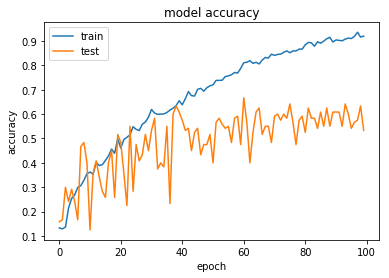

In [62]:
# Plotting the Train Valid Accuracy Graph

plt.plot(cnnhistory.history['categorical_accuracy'])
plt.plot(cnnhistory.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

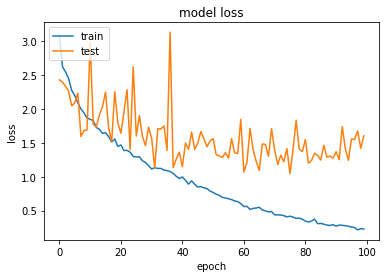

In [63]:
# Plotting the Train Valid Loss Graph

plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Evaluate the model

In [96]:
#saving the model.json
import json
model_json=model.to_json()
with open("Audio_2DCNN_LogMelModel_4L.json","w") as json_file:
    json_file.write(model_json)

In [97]:
#loading json and creating model
from keras.models import model_from_json
json_file=open("Audio_2DCNN_LogMelModel_4L.json","r") 
loaded_model_json=json_file.read()
json_file.close()
loaded_model=model_from_json(loaded_model_json)

In [98]:
from keras.models import load_model
#Returns a compiled model identical to the previous one
loaded_model.load_weights('Audio_2DCNN_4L.h5')

In [99]:
#evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
score=loaded_model.evaluate(x_testcnn,y_test,verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1],score[1]*100))

acc: 66.67%


In [100]:
x_test_data=audios[(dataset_db['split']=='Test')]
y_test_data=dataset_db.emotion_lb[(dataset_db['split']=='Test')]
print(x_test_data.shape,y_test_data.shape)

(120, 128, 259, 1) (120,)


In [101]:
preds=loaded_model.predict(x_test_data,batch_size=16,verbose=1)
pred1=preds.argmax(axis=1)
abc=pred1.astype(int).flatten()
predictions=(lb.inverse_transform((abc)))

120/120 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 8s 68ms/step


In [102]:
pred_df=pd.DataFrame({'predictedvalues':predictions})
pred_df[:10]

,predictedvalues
0,male_neutral
1,male_angry
2,male_neutral
3,male_neutral
4,male_neutral
5,male_neutral
6,male_neutral
7,male_neutral
8,male_neutral
9,male_neutral


In [103]:
actual_df=pd.DataFrame({'actualvalues':y_test_data})
actual_df[:10]
actual_df.index=range(len(actual_df.index))

In [104]:
final_df=pd.concat([actual_df,pred_df],axis=1)
final_df.head()

,actualvalues,predictedvalues
0,male_neutral,male_neutral
1,male_neutral,male_angry
2,male_neutral,male_neutral
3,male_neutral,male_neutral
4,male_neutral,male_neutral


In [105]:
import seaborn as sns
def print_confusion_matrix(confusion_matrix,class_names,figsize=(9,6),fontsize=14):
    df_cm=pd.DataFrame(confusion_matrix,index=class_names,columns=class_names,)
    fig=plt.figure(figsize=figsize)
    try:
        heatmap=sns.heatmap(df_cm,annot=True,fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(),rotation=0,ha='right',fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(),rotation=45,ha='right',fontsize=fontsize)
    plt.ylabel('True label')
    plt.ylabel('Predicted label')

In [106]:
from sklearn.metrics import accuracy_score
y_true=final_df.actualvalues
y_pred=final_df.predictedvalues
accuracy_score(y_true,y_pred)*100

52.5

In [107]:
from sklearn.metrics import f1_score
f1_score(y_true,y_pred,average='macro')*100

C:\Users\ayush\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


45.45796702970824

In [108]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_true,y_pred)
c

array([[ 6,  1,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  2,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  5,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  2,  4,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  7,  5,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  3,  0,  0,  0,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  1,  0,  0,  6,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  1,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  4],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  6,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  2,  0,  0,  0,  0,  0,  4,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  6],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0, 11,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  0,  2,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  8]],
      dtype=int64)

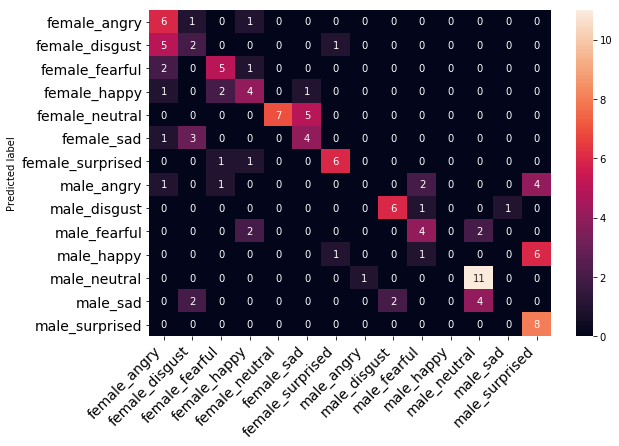

In [109]:
class_names=sorted(set(final_df.actualvalues))
print_confusion_matrix(c, class_names)